Make test data spectrogram images from data

Requires: 
* data csv (1xN), to replace 'dEDF.csv' below
* time csv (1XN), to replace 'tEDF.csv' below

In [20]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter
from PIL import Image
from matplotlib.pyplot import specgram
from matplotlib.mlab import window_hanning
import scipy

In [21]:
# data file
dEDF = pd.read_csv('dEDF.csv').values
# time file
tEDF = pd.read_csv('tEDF.csv').values

In [22]:
Fs = 1/(tEDF[3]-tEDF[2])
winSize = int(np.round(Fs))
winStep = int(np.round(Fs/2))
movingwin    = [0.200,0.005] # Window size, Step size [s]
iWin   = int(np.round(movingwin[0]*Fs/2)*2);
iStep  = int(np.round(movingwin[1]*Fs/2)*2);
noverlap = iWin-iStep
i_stop = 0
i = 0
counter = 0

In [25]:
def hannspecgramc(d1,movingwin,Fs,tEDF,flo,fhi):
    iStart = 1;
    iWin   = int(np.round(movingwin[0]*Fs/2)*2);
    iStep  = int(np.round(movingwin[1]*Fs/2)*2);
    T      = iWin/Fs;
    df     = 1/T;
    fNQ    = Fs/2;
    freq   = range(0,int(iWin/2+1))*df;
    counter=1;
    S      = np.zeros([int(np.ceil(len(tEDF)/iStep)), int(iWin/2+1)]);
    times  = np.zeros([int(np.ceil(len(tEDF)/iStep)), 1]);
    while iStart+iWin < len(tEDF):
        dnow    = d1[iStart:iStart+iWin-1];
        dnow    = dnow - np.mean(dnow);
        dnow    = np.hanning(len(dnow))*np.squeeze(dnow);
        spectrum= np.real(scipy.fft.fft(dnow)*np.conjugate(scipy.fft.fft(dnow)));
        S[counter,:]   = spectrum[:int(iWin/2+1)];
        times[counter] = tEDF[int(iStart+iWin/2)];

        counter=counter+1;
        iStart = iStart + iStep;
    S = S[:counter-1,:];
    times = times[:counter-1];
    S = S[:,(freq>=flo)&(freq<=fhi)]
    freq = freq[(freq>=flo)&(freq<=fhi)]
    return S,times,freq

In [18]:
import os
folder_name = 'test_data';
os.mkdir(folder_name)

<ipython-input-26-3d87c527b2de>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = matplotlib.pyplot.subplots(figsize=(6,6))


KeyboardInterrupt: 

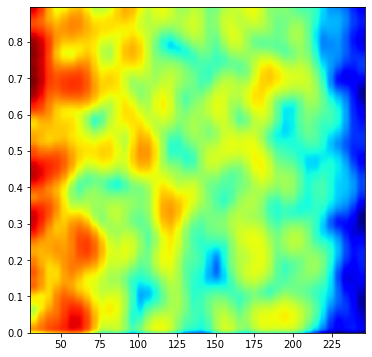

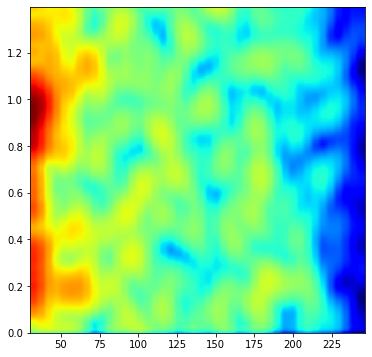

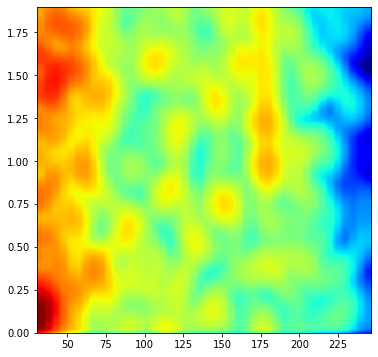

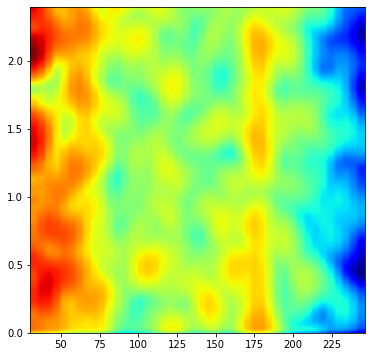

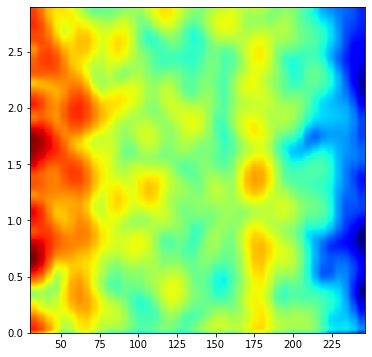

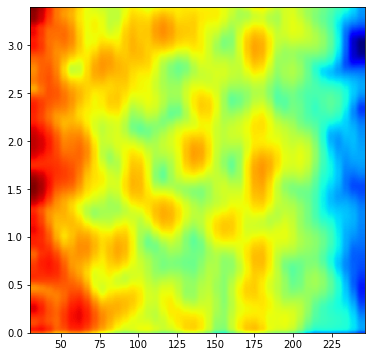

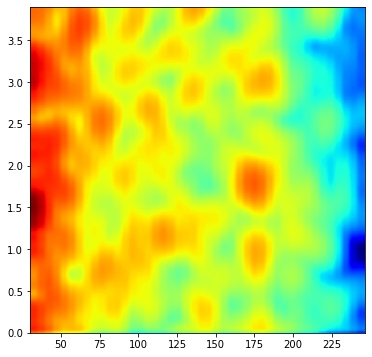

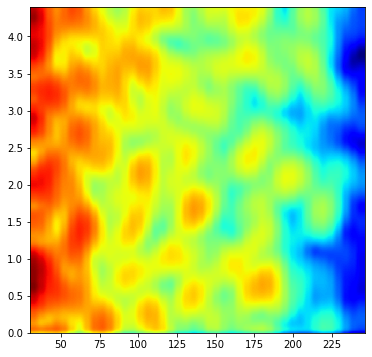

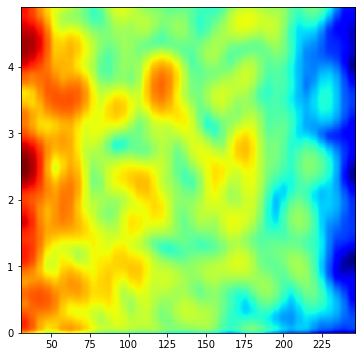

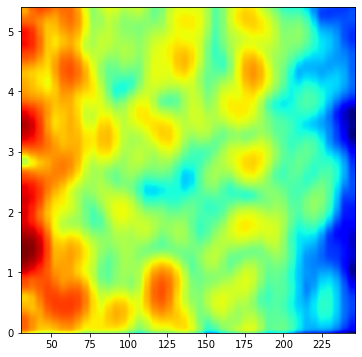

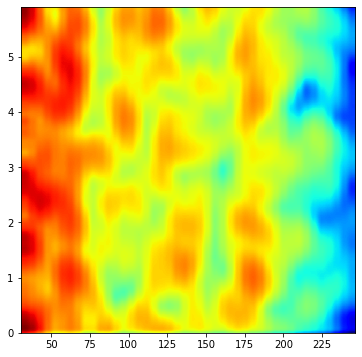

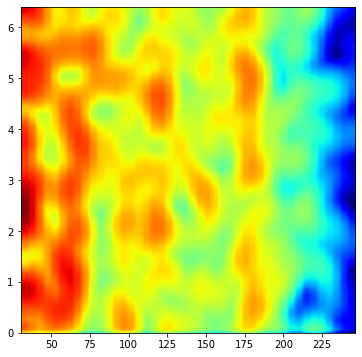

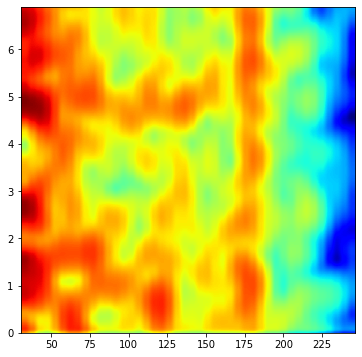

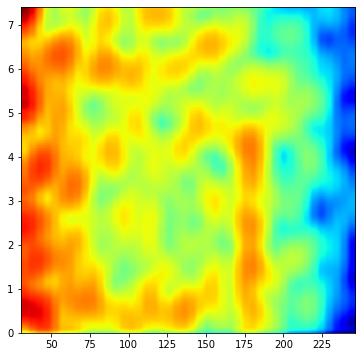

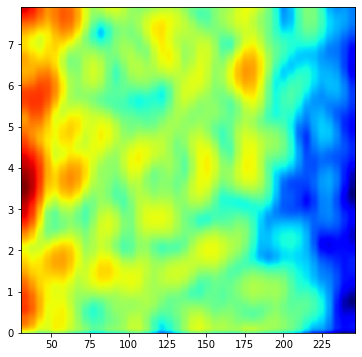

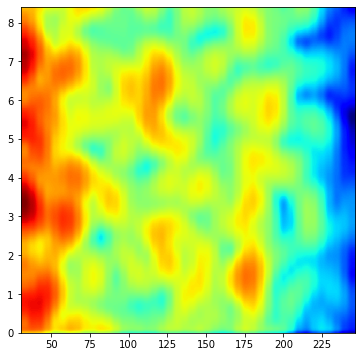

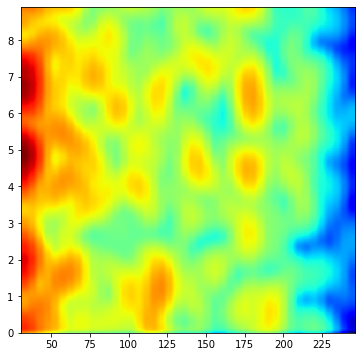

Error in callback <function flush_figures at 0x7ff2cbf7a700> (for post_execute):


KeyboardInterrupt: 

In [26]:
while tEDF[i_stop] < 600: 
#only looking at the first 600 seconds, can change to any value

    i_start = i
    i_stop  = i_start + winSize - 1

    dspec = dEDF[i_start:i_stop]
    dspec = dspec - np.mean(dspec)
    t     = tEDF[i_start:i_stop]
    flo = 30
    fhi = 250
    movingwin    = [0.200,0.005] # Window size, Step size [s]
    S0,S_times,S_freq = hannspecgramc(dspec,movingwin,Fs,t,flo,fhi)
    #Smooth the spectra.
    t_smooth = 11
    dt_S     = S_times[2]-S_times[1]
    S_smooth = gaussian_filter(S0,1)

    A = np.log10(S_smooth)
    A = np.flipud(A)
    fig, ax = matplotlib.pyplot.subplots(figsize=(6,6))
    ax.imshow(A,cmap='jet',
           extent = [min(S_freq),max(S_freq),min(S_times)[0],max(S_times)[0]],
             aspect = 'auto')

    name = 'test_data/img_'+ str(counter)+'.jpg'
    ax.set_axis_off()
    fig.savefig(name)
    
    i = i_start + winStep;
    counter=counter+1;